In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('premier_league_players.csv')

In [3]:
df.head()

,Player Name,Age,Market Value,Club,Position,Nationality
0,Erling Haaland,24,€180.00m,Manchester City,Centre-Forward,Norway
1,Bukayo Saka,23,€150.00m,Arsenal FC,Right Winger,England
2,Florian Wirtz,22,€140.00m,Liverpool FC,Attacking Midfield,Germany
3,Cole Palmer,23,€120.00m,Chelsea FC,Attacking Midfield,England
4,Alexander Isak,25,€120.00m,Newcastle United,Centre-Forward,Sweden


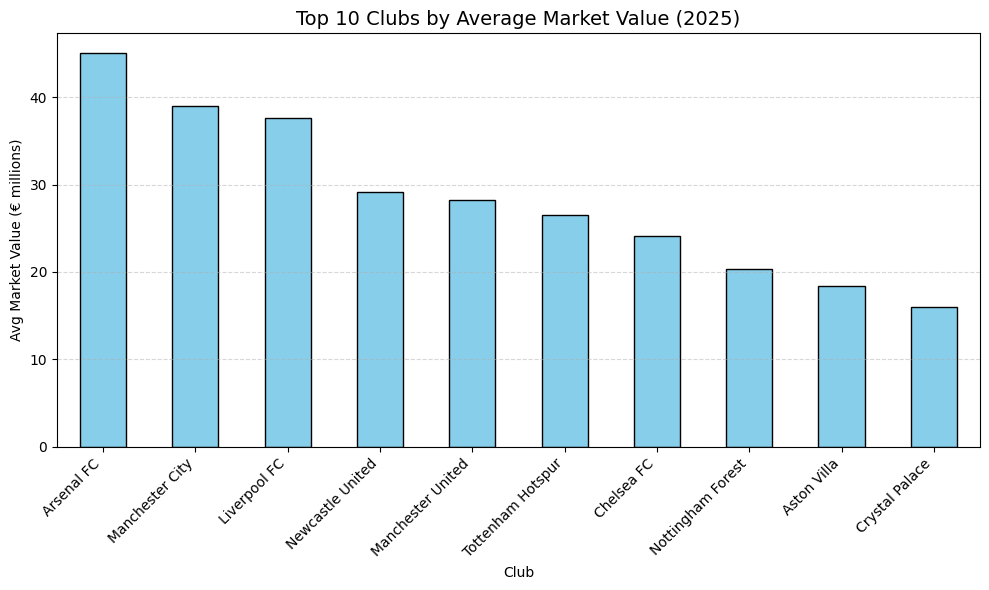

In [4]:
# Clean the market value
def value_to_float(val):
    val = val.replace("€", "").replace("m", "").replace(",", "").strip()
    try:
        return float(val)
    except:
        return None

df["MarketValue_float"] = df["Market Value"].apply(value_to_float)

# Group by club and take average
club_avg = df.groupby("Club")["MarketValue_float"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
club_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Clubs by Average Market Value (2025)", fontsize=14)
plt.xlabel("Club")
plt.ylabel("Avg Market Value (€ millions)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


C:\Users\Piyush Sharma\AppData\Local\Temp\ipykernel_29728\1483606408.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Piyush Sharma\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


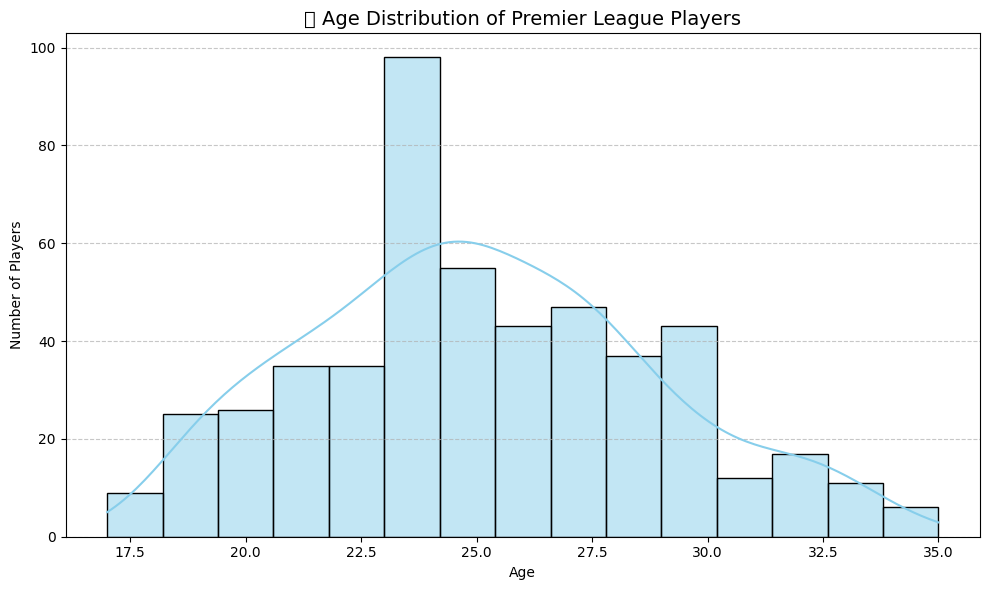

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution of Premier League Players", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Piyush Sharma\AppData\Local\Temp\ipykernel_29728\837067539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_avg.values, y=position_avg.index, palette="flare")


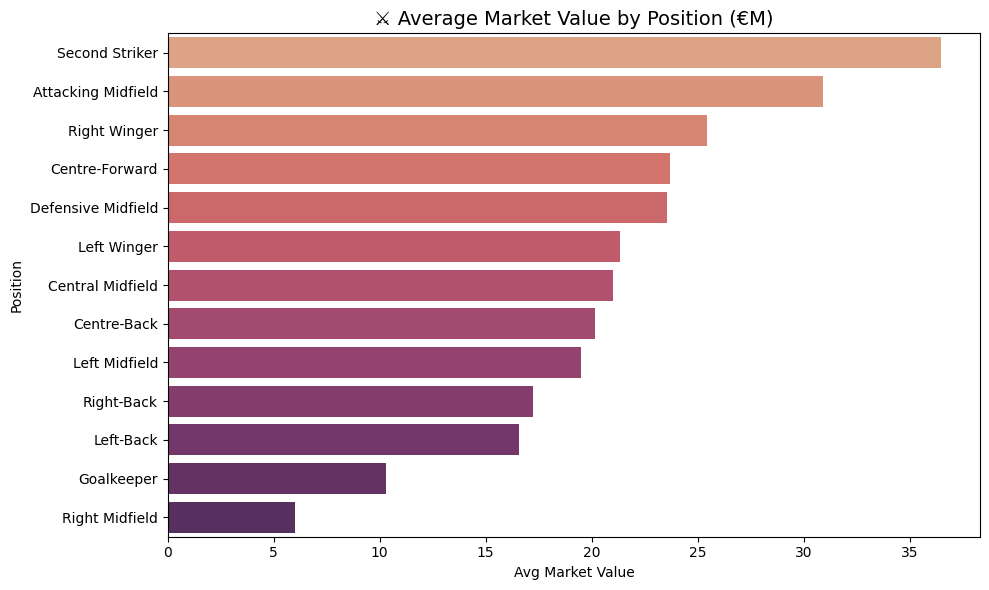

In [6]:
position_avg = df.groupby("Position")["MarketValue_float"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=position_avg.values, y=position_avg.index, palette="flare")
plt.title(" Average Market Value by Position (€M)", fontsize=14)
plt.xlabel("Avg Market Value")
plt.ylabel("Position")
plt.tight_layout()
plt.show()


C:\Users\Piyush Sharma\AppData\Local\Temp\ipykernel_29728\2805274584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players['MarketValue_float'], y=top_players['Player Name'], palette="mako")
C:\Users\Piyush Sharma\AppData\Local\Temp\ipykernel_29728\2805274584.py:8: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Piyush Sharma\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


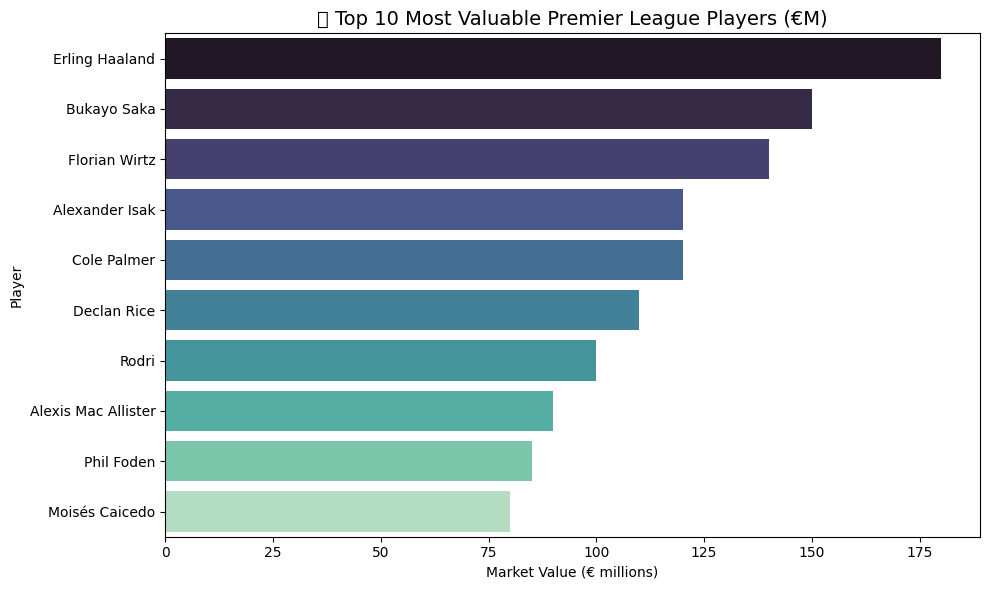

In [7]:
top_players = df[['Player Name', 'MarketValue_float']].sort_values(by='MarketValue_float', ascending=False).dropna().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_players['MarketValue_float'], y=top_players['Player Name'], palette="mako")
plt.title(" Top 10 Most Valuable Premier League Players (€M)", fontsize=14)
plt.xlabel("Market Value (€ millions)")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


C:\Users\Piyush Sharma\AppData\Local\Temp\ipykernel_29728\3425529748.py:6: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Piyush Sharma\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


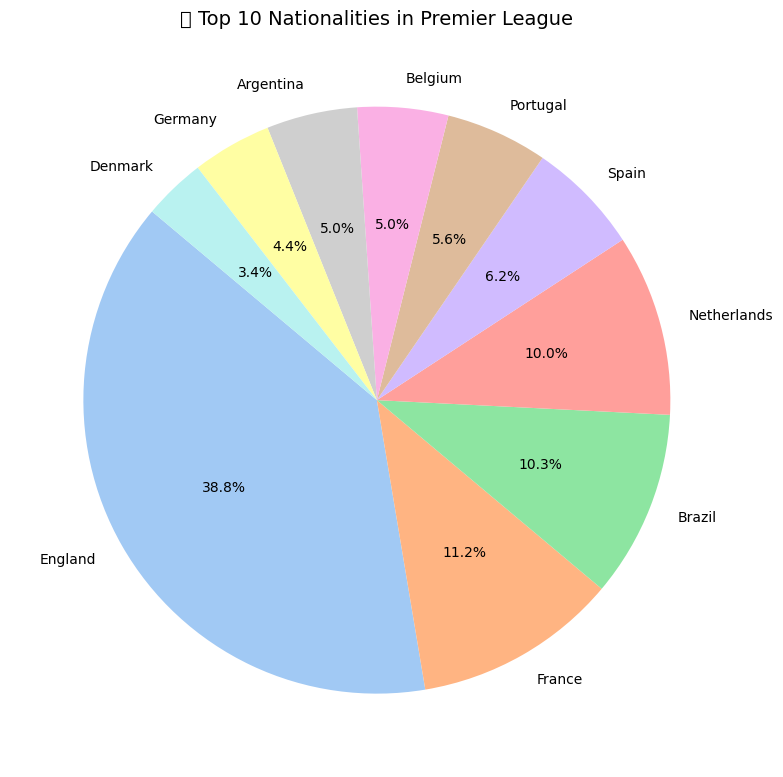

In [8]:
top_nationalities = df['Nationality'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_nationalities, labels=top_nationalities.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 10 Nationalities in Premier League", fontsize=14)
plt.tight_layout()
plt.show()
